# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from oauth2client.client import GoogleCredentials

from google.colab import auth as google_auth
google_auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Reading datasets

In [14]:
path = '/content/gdrive/MyDrive/IIT Chicago /Coursework /OULAD_analysis/'

assessments = pd.read_csv(path + "assessments.csv")

courses = pd.read_csv(path + "courses.csv")

student_assessment = pd.read_csv(path + "studentAssessment.csv")

student_info = pd.read_csv(path + "studentInfo.csv")

student_registration = pd.read_csv(path + "studentRegistration.csv")

student_vle = pd.read_csv(path + "studentVle.csv")

vle = pd.read_csv(path + "vle.csv")

In [15]:
domains=pd.DataFrame(
    {
        "code_module": ["AAA", "BBB", "CCC", "DDD", "EEE", "FFF", "GGG"],
        "domain": [
            "Social Sciences",
            "Social Sciences",
            "STEM",
            "STEM",
            "STEM",
            "STEM",
            "Social Sciences",
        ],
    },
)

# EDA

In [ ]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [ ]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [ ]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
student_info.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
domains.head()

,code_module,domain
0,AAA,Social Sciences
1,BBB,Social Sciences
2,CCC,STEM
3,DDD,STEM
4,EEE,STEM


In [ ]:
print(
    "OULAD contains data about:\n"
    f"  - {courses.shape[0]} courses from {courses.code_module.nunique()} modules "
    "(4 STEM modules and 3 Social Sciences modules)\n"
    f"  - {student_info.shape[0]} students\n"
    f"  - {student_registration.shape[0]} student registrations\n"
    f"  - {student_vle.shape[0]} VLE interaction entries"
)

OULAD contains data about:
  - 22 courses from 7 modules (4 STEM modules and 3 Social Sciences modules)
  - 32593 students
  - 32593 student registrations
  - 10655280 VLE interaction entries


In [ ]:
print("assessments: ", assessments.shape)
print("courses: ", courses.shape)
print("student_assessment: ", student_assessment.shape)
print("student_info: ", student_info.shape)
print("student_registration: ", student_registration.shape)
print("student_vle: ", student_vle.shape)
print("vle: ", vle.shape)

assessments:  (206, 6)
courses:  (22, 3)
student_assessment:  (173912, 5)
student_info:  (32593, 12)
student_registration:  (32593, 5)
student_vle:  (10655280, 6)
vle:  (6364, 6)


In [ ]:
student_info[['id_student']].value_counts()

id_student
584077        5
157310        4
565275        4
172965        4
624126        4
             ..
551938        1
551922        1
551906        1
551902        1
2716795       1
Name: count, Length: 28785, dtype: int64

In [ ]:
# There are 28785 unique students ==> single student can register into multiple courses
# Same student registering in multiple cources
student_info[student_info["id_student"] == 584077]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9587,CCC,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
11525,CCC,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,90,N,Withdrawn
15596,DDD,2013J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
16828,DDD,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,150,N,Withdrawn
18139,DDD,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,2,90,N,Withdrawn


In [ ]:
student_info.id_student.isnull().sum()

0

In [ ]:
student_info.groupby('id_student')['id_student'].agg(['count']).sort_values(by=['count'], ascending=False)

,count
id_student,
584077,5
157310,4
565275,4
172965,4
624126,4
...,...
551938,1
551922,1
551906,1


In [ ]:
student_info.groupby('id_student')['id_student'].agg(['count']).groupby('count')['count'].count()

count
1    25247
2     3293
3      221
4       23
5        1
Name: count, dtype: int64

<Axes: title={'center': '# of students in code_module and code_preentation'}, xlabel='code_module'>

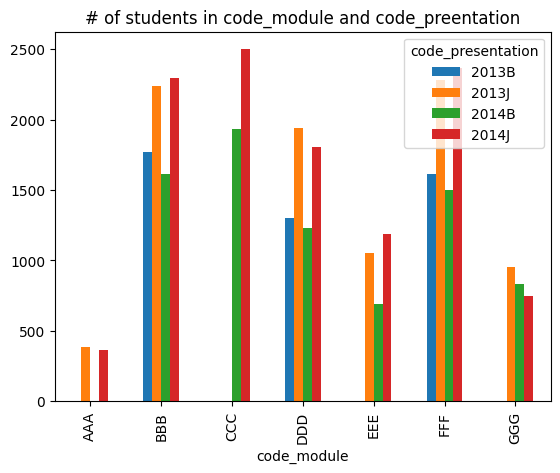

In [ ]:
student_info.groupby(['code_module', 'code_presentation'])['id_student'].size().unstack()\
.plot.bar(title = "# of students in code_module and code_preentation")

# Droupout target creation

In [ ]:
# target variable creation

click_stream = (
    # 1. Extract the number of clicks by students on the three types of material.
    vle.query("activity_type in ['resource', 'oucontent', 'forumng']")
    .drop(["code_module", "code_presentation", "week_from", "week_to"], axis=1)
    .merge(student_vle, on="id_site")
    # 2. Sum the number of clicks each student makes on each type of material by day.
    .groupby(
        ["code_module", "code_presentation", "id_student", "activity_type", "date"]
    )
    .agg({"sum_click": "sum"})
    # 3. Align each student’s total clicks on each type of material by days.
    .pivot_table(
        values="sum_click",
        index=["code_module", "code_presentation", "id_student", "activity_type"],
        columns="date",
        fill_value=0.0,
    )
    # 4. Add the dropout label, withdrawn as `1`, otherwise as `0`.
    .join(
        student_info.filter(
            ["code_module", "code_presentation", "id_student", "final_result"]
        )
        .assign(final_result=lambda df: (df.final_result == "Withdrawn").astype(int))
        .set_index(["code_module", "code_presentation", "id_student"])
    )
)
display(click_stream)

-25  -24  -23  -22  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   

                                                        -21  -20  -19  -18  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   

                                                        -17  -16  ...  261  \
code_module code_presentation id_student activity_type            ...        
AAA         2013J             11391      forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   
                              28400      forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   
                              2684003    forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   

                                                        262  263  264  265  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0 

In [ ]:
print(
    f"# rows in studentInfo: {student_info.shape[0]}"\
    f"\n# unique students: {student_info[['id_student']].drop_duplicates().shape[0]}"\
    f"\n# unique code_module - code_presentation - id_student combinations: {student_info[['code_module', 'code_presentation', 'id_student']].drop_duplicates().shape[0]}"
)

# rows in studentInfo: 32593
# unique students: 28785
# unique code_module - code_presentation - id_student combinations: 32593


In [ ]:
click_stream.shape

(80524, 296)

<Axes: title={'center': 'Withdrawn (1) vs not withdrawn (0)'}, ylabel='final_result'>

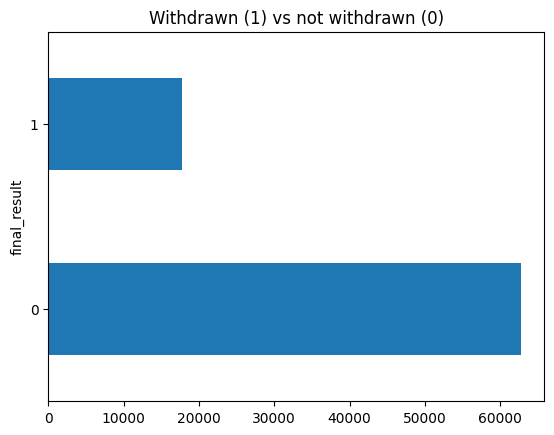

In [ ]:
click_stream['final_result'].value_counts().plot.barh(title="Withdrawn (1) vs not withdrawn (0)")

In [ ]:
click_stream.groupby(['code_module', 'final_result']).size().unstack()\
# .plot.bar(title = "Target variable dist. across Activity Types")

final_result,0,1
code_module,,
AAA,1844,322
BBB,14580,2896
CCC,6815,3710
DDD,11576,4589
EEE,6230,1098
FFF,15672,4701
GGG,6006,485


# Detail EDA: student_info

In [ ]:
student_info.groupby(['code_module', 'code_presentation'])['id_student'].agg(['count', 'nunique'])

count  nunique
code_module code_presentation                
AAA         2013J                383      383
            2014J                365      365
BBB         2013B               1767     1767
            2013J               2237     2237
            2014B               1613     1613
            2014J               2292     2292
CCC         2014B               1936     1936
            2014J               2498     2498
DDD         2013B               1303     1303
            2013J               1938     1938
            2014B               1228     1228
            2014J               1803     1803
EEE         2013J               1052     1052
            2014B                694      694
            2014J               1188     1188
FFF         2013B               1614     1614
            2013J               2283     2283
            2014B               1500     1500
            2014J               2365     2365
GGG         2013J                952      952
            2014B                833      833
            2014J                749      749

In [ ]:
student_info.groupby('gender')['id_student'].agg(['count'])

,count
gender,
F,14718
M,17875


In [ ]:
student_info.groupby('region')['id_student'].agg(['count'])

,count
region,
East Anglian Region,3340
East Midlands Region,2365
Ireland,1184
London Region,3216
North Region,1823
North Western Region,2906
Scotland,3446
South East Region,2111
South Region,3092


In [ ]:
student_info.groupby('highest_education')['id_student'].agg(['count'])

,count
highest_education,
A Level or Equivalent,14045
HE Qualification,4730
Lower Than A Level,13158
No Formal quals,347
Post Graduate Qualification,313


In [ ]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

In [ ]:
student_info.groupby('imd_band')['id_student'].agg(['count'])

,count
imd_band,
0-10%,3311
10-20,3516
20-30%,3654
30-40%,3539
40-50%,3256
50-60%,3124
60-70%,2905
70-80%,2879
80-90%,2762


In [ ]:
student_info.groupby('age_band')['id_student'].agg(['count'])

,count
age_band,
0-35,22944
35-55,9433
55<=,216


In [ ]:
student_info.groupby('num_of_prev_attempts')['id_student'].agg(['count'])

,count
num_of_prev_attempts,
0,28421
1,3299
2,675
3,142
4,39
5,13
6,4


In [ ]:
student_info.groupby('disability')['id_student'].agg(['count'])

,count
disability,
N,29429
Y,3164


In [ ]:
student_info.groupby('final_result')['id_student'].agg(['count'])

,count
final_result,
Distinction,3024
Fail,7052
Pass,12361
Withdrawn,10156


In [ ]:
student_info.groupby('final_result')['id_student'].agg(['count']).transform(lambda x: x/x.sum())

,count
final_result,
Distinction,0.092781
Fail,0.216365
Pass,0.379253
Withdrawn,0.311601


<Axes: ylabel='age_band'>

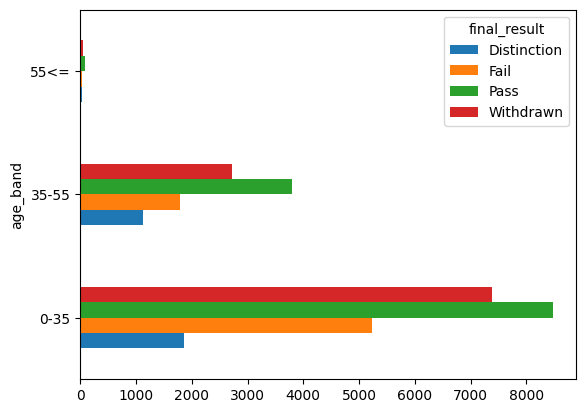

In [ ]:
student_info.groupby(["age_band", "final_result"]).size().unstack().plot.barh()

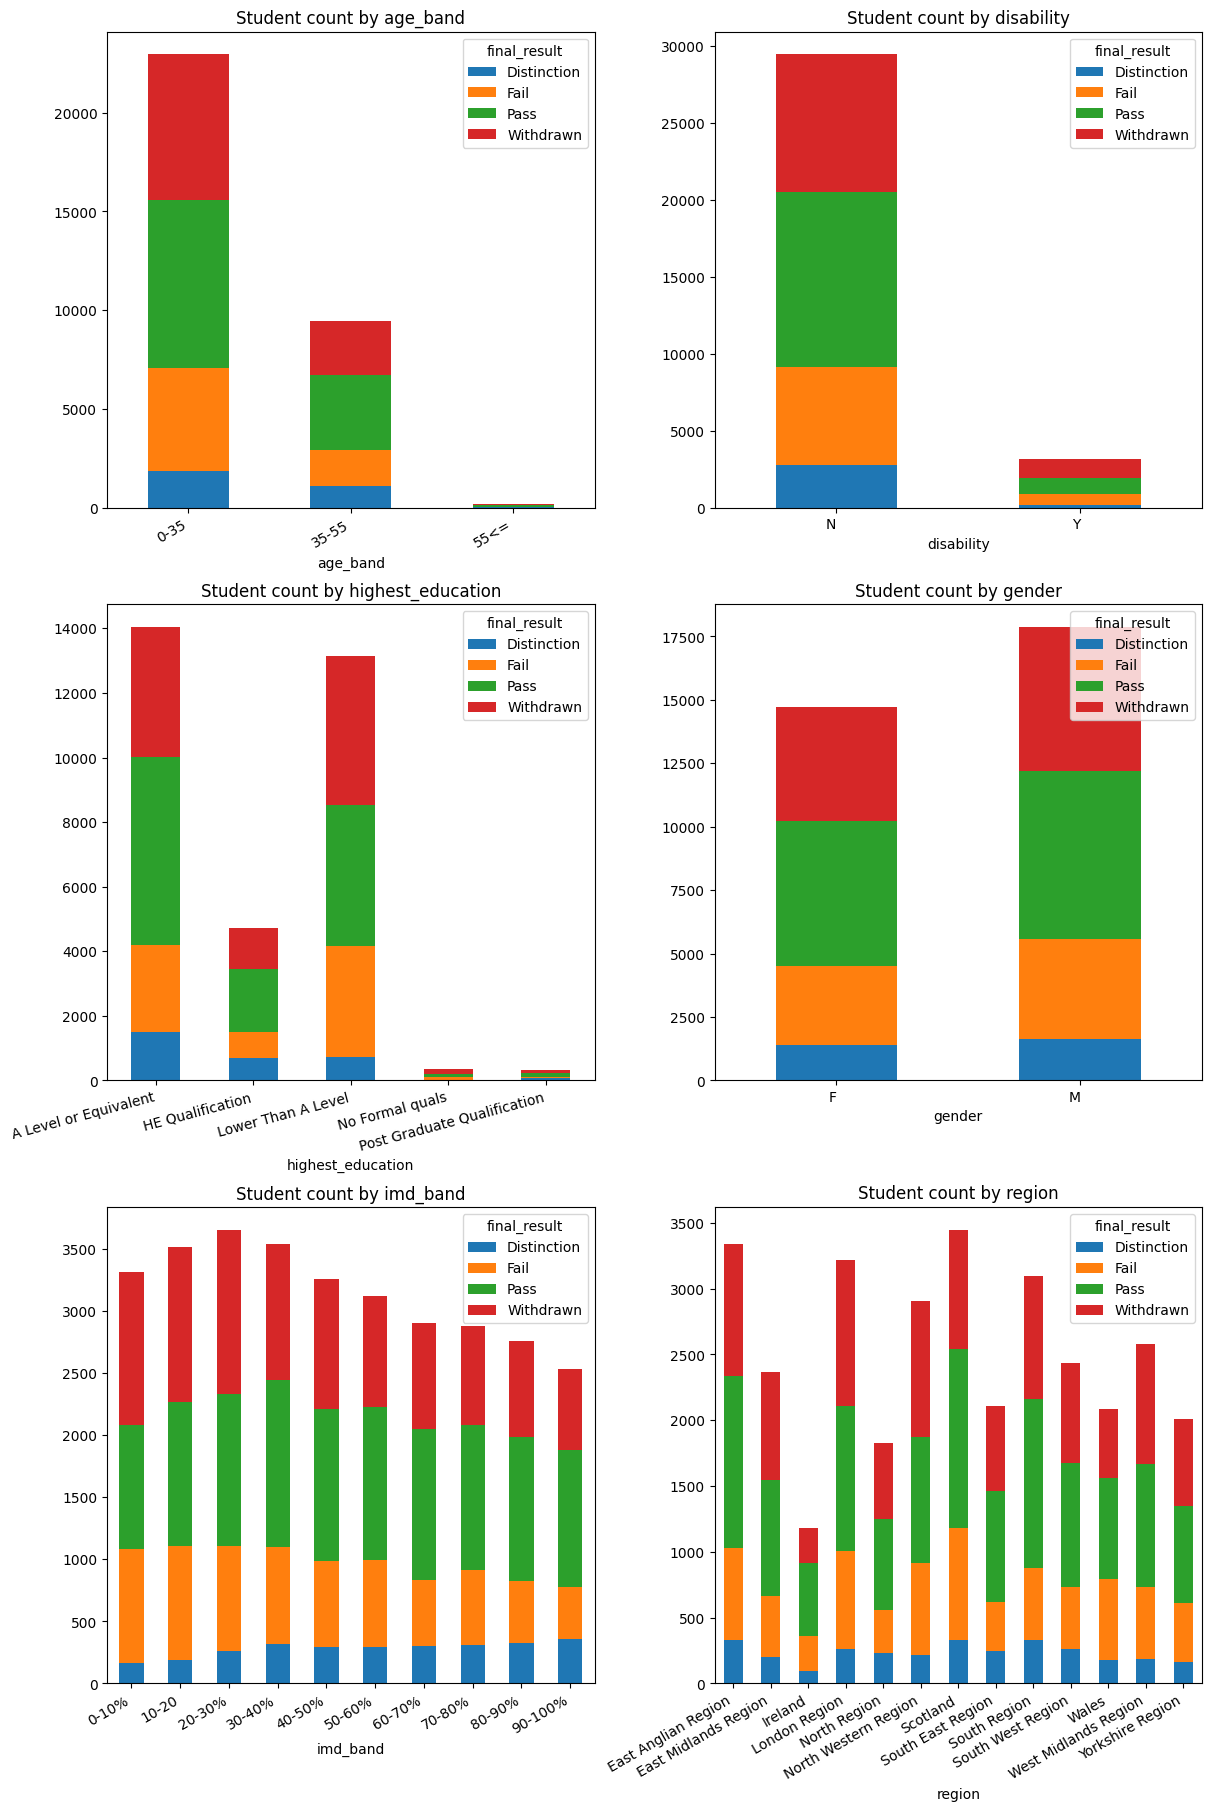

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), constrained_layout=True)

# color = (0.2, # redness
#          0.4, # greenness
#          0.2, # blueness
#          0.6 # transparency
#          )
plt.draw()

student_info.groupby(["age_band", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[0, 0], title="Student count by age_band"
)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=30, ha='right')

student_info.groupby(["disability", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[0, 1], title="Student count by disability"
)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0, ha='right')

student_info.groupby(
    ["highest_education", "final_result"]
).size().unstack().plot.bar(
    stacked=True, ax=axes[1, 0], title="Student count by highest_education"
)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15, ha='right')

student_info.groupby(["gender", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[1, 1], title="Student count by gender"
)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0, ha='right')

student_info.groupby(["imd_band", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[2, 0], title="Student count by imd_band"
)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=30, ha='right')

student_info.groupby(["region", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[2, 1], title="Student count by region"
)
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=30, ha='right')

plt.show()


## CCC module

In [ ]:
ccc_student_info = student_info[student_info.code_module == "CCC"].drop("code_module", axis=1)
ccc_student_info.head()

,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
8657,2014B,28418,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail
8658,2014B,29764,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction
8659,2014B,29820,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass
8660,2014B,40333,M,North Region,HE Qualification,0-10%,35-55,0,30,N,Withdrawn
8661,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass


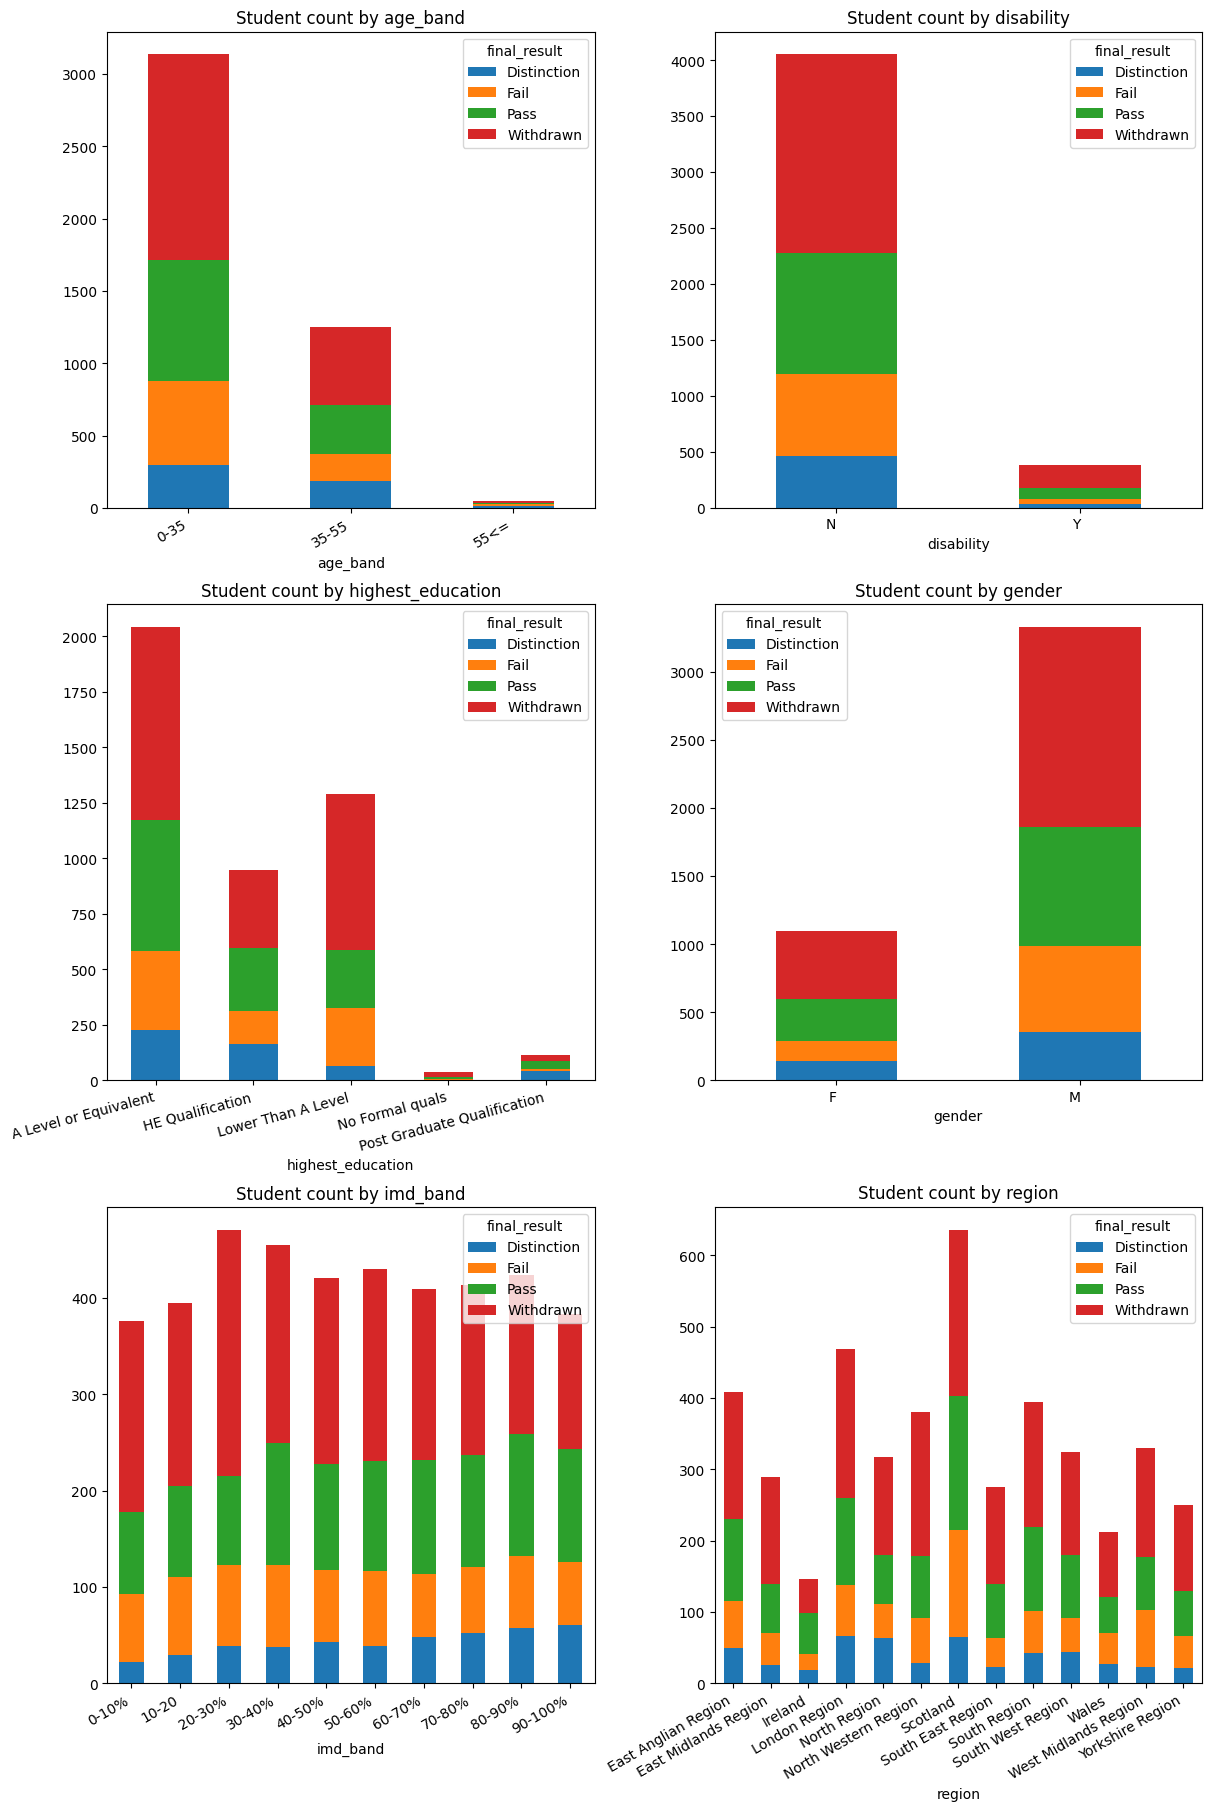

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), constrained_layout=True)

plt.draw()

ccc_student_info.groupby(["age_band", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[0, 0], title="Student count by age_band"
)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=30, ha='right')

ccc_student_info.groupby(["disability", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[0, 1], title="Student count by disability"
)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0, ha='right')

ccc_student_info.groupby(
    ["highest_education", "final_result"]
).size().unstack().plot.bar(
    stacked=True, ax=axes[1, 0], title="Student count by highest_education"
)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15, ha='right')

ccc_student_info.groupby(["gender", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[1, 1], title="Student count by gender"
)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0, ha='right')

ccc_student_info.groupby(["imd_band", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[2, 0], title="Student count by imd_band"
)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=30, ha='right')

ccc_student_info.groupby(["region", "final_result"]).size().unstack().plot.bar(
    stacked=True, ax=axes[2, 1], title="Student count by region"
)
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=30, ha='right')

plt.show()


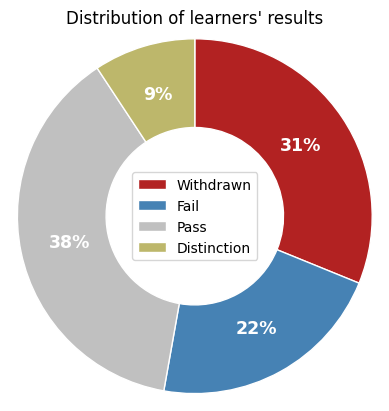

In [ ]:
(
    student_info.final_result.value_counts()
    .loc[["Withdrawn", "Fail", "Pass", "Distinction"]]
    .plot.pie(
        title="Distribution of learners' results",
        ylabel="",
        wedgeprops={"width": 0.6, "edgecolor": "w"},
        autopct="%1.0f%%",
        pctdistance=0.72,
        colors=["firebrick", "steelblue", "silver", "darkkhaki"],
        startangle=-270,
        counterclock=False,
        labeldistance=None,
        radius=1.2,
        textprops={"color": "white", "weight": "bold", "fontsize": 12.5},
    )
)
plt.legend(loc="center")
plt.show()

# Few notes
1. The initial total number of students in the selected modules was 38239.

2. Students in a module presentation are organized into study groups of ~20 people.

3. Module resources are available from the VLE system a few weeks before the start.

4. If the final exam date is missing in the assessments table, it takes place during the last week of the module presentation.

5. The structure of B and J presentations may differ.

6. In the student_registration table, the student has withdrawn if the date_unregistration field is present.

7. If the student does not submit an assessment, no result is recorded.

8. The results of the final exam are usually missing.

9. An assessment score lower than 40 is interpreted as a failure.


# Detail EDA: student_registration

In [ ]:
student_registration.groupby(['code_module', 'code_presentation'], as_index = False).count()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,383,383,60
1,AAA,2014J,365,365,66
2,BBB,2013B,1767,1766,505
3,BBB,2013J,2237,2235,647
4,BBB,2014B,1613,1608,489
5,BBB,2014J,2292,2291,736
6,CCC,2014B,1936,1931,898
7,CCC,2014J,2498,2495,1049
8,DDD,2013B,1303,1299,431
9,DDD,2013J,1938,1933,684


In [ ]:
student_registration.groupby(
        ["code_module", "code_presentation"], as_index=False
    ).count().groupby(["code_module"]).agg(
        presentations=pd.NamedAgg(column="code_presentation", aggfunc="count"),
        students=pd.NamedAgg(column="id_student", aggfunc="sum"),
    )

,presentations,students
code_module,,
AAA,2,748
BBB,4,7909
CCC,2,4434
DDD,4,6272
EEE,3,2934
FFF,4,7762
GGG,3,2534


In [ ]:
registration_count = (
    student_registration.groupby(
        ["code_module", "code_presentation"], as_index=False
    )
    .count()
    .groupby(["code_module"])
    .agg(
        presentations=pd.NamedAgg(column="code_presentation", aggfunc="count"),
        students=pd.NamedAgg(column="id_student", aggfunc="sum"),
    )
)
domains.join(registration_count, on="code_module")

,code_module,domain,presentations,students
0,AAA,Social Sciences,2,748
1,BBB,Social Sciences,4,7909
2,CCC,STEM,2,4434
3,DDD,STEM,4,6272
4,EEE,STEM,3,2934
5,FFF,STEM,4,7762
6,GGG,Social Sciences,3,2534


In [ ]:
# Student registration count by module-presentation

registration_count = student_registration.groupby(
    ["code_module", "code_presentation"]
).size()
registration_count.reset_index()

,code_module,code_presentation,0
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


In [ ]:
max_id = registration_count.idxmax()
min_id = registration_count.idxmin()
print(
    f"The largest module-presentation {max_id} contains "
    f"{registration_count[max_id]} student registrations.\n"
    f"The smallest module-presentation {min_id} contains "
    f"{registration_count[min_id]} student registrations. \n"
    f"The average module-presentation registration count is "
    f"{registration_count.mean()}."
)

The largest module-presentation ('CCC', '2014J') contains 2498 student registrations.
The smallest module-presentation ('AAA', '2014J') contains 365 student registrations. 
The average module-presentation registration count is 1481.5.


# Detail EDA: assessments

In [ ]:
#Student assessment count
print(
    f"Assesment table shape: {assessments.shape}."
    f"\nDistinct codeModule, codePresentations: {len(assessments[['code_module', 'code_presentation']].drop_duplicates())}"
)

Assesment table shape: (206, 6).
Distinct codeModule, codePresentations: 22


In [ ]:
len(assessments[['code_module', 'code_presentation']].drop_duplicates())

22

In [ ]:
assessments[assessments.assessment_type == 'Exam']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [ ]:
print(
    f"CodeModule, codePresentations with more than one exam.\n"
)

rdf = assessments[assessments.assessment_type == 'Exam']\
  .groupby(['code_module', 'code_presentation'], as_index=False)\
  .agg(examCount = pd.NamedAgg(column='assessment_type', aggfunc='count'))
rdf[rdf.examCount == 2]

,code_module,code_presentation,examCount
6,CCC,2014B,2
7,CCC,2014J,2


In [ ]:
# Student assessment count

exams = assessments[assessments.assessment_type == "Exam"]
print(
    f"The student_assessment table contains {student_assessment.shape[0]} rows."
    "\n"
    f"The assessment table contains {assessments.shape[0]} rows in which {exams.shape[0]} are Exams.\n"
    f"{pd.merge(student_assessment, exams, on='id_assessment').shape[0]} "
    "student_assessments are Exams."
)

The student_assessment table contains 173912 rows.
The assessment table contains 206 rows in which 24 are Exams.
4959 student_assessments are Exams.


In [ ]:
rdf = assessments.merge(
    student_assessment, on="id_assessment"
).query("date_submitted <= date")[["id_student", "id_assessment", "date_submitted", "date", "score"]]
rdf

,id_student,id_assessment,date_submitted,date,score
0,11391,1752,18,19.0,78.0
2,31604,1752,17,19.0,72.0
4,38053,1752,19,19.0,79.0
6,45642,1752,18,19.0,72.0
7,52130,1752,19,19.0,72.0
...,...,...,...,...,...
173905,652414,37437,173,173.0,65.0
173906,652435,37437,172,173.0,65.0
173907,652462,37437,172,173.0,60.0
173910,653252,37437,171,173.0,70.0


In [ ]:
rdf.groupby("id_student")[["score"]].count()

,score
id_student,
6516,5
8462,6
11391,5
23629,1
23698,4
...,...
2698251,7
2698257,3
2698535,4


In [ ]:
rdf.groupby("id_student")[["score"]].count().div(assessments.shape[0])

,score
id_student,
6516,0.024272
8462,0.029126
11391,0.024272
23629,0.004854
23698,0.019417
...,...
2698251,0.033981
2698257,0.014563
2698535,0.019417


In [ ]:
vleMerg = student_vle.merge(vle, on="id_site")
vleMerg.activity_type.value_counts()

activity_type
forumng           2408457
oucontent         1963782
subpage           1949898
homepage          1735226
quiz               914573
resource           813185
url                407716
ouwiki             178165
oucollaborate       65793
externalquiz        50910
page                47549
questionnaire       44905
ouelluminate        22360
glossary            17435
dataplus            13506
dualpane            10153
htmlactivity         6835
folder               4678
sharedsubpage         148
repeatactivity          6
Name: count, dtype: int64

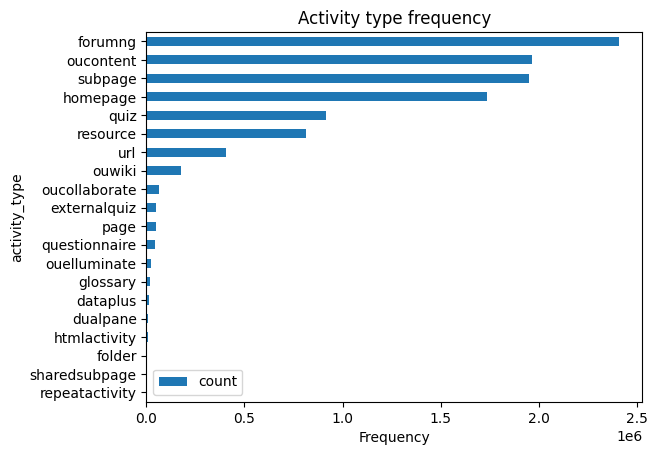

In [ ]:
vleMerg.activity_type.value_counts(ascending = True).to_frame()\
       .plot.barh(title="Activity type frequency", xlabel="Frequency")
plt.show()

In [ ]:
rdf = student_vle[(student_vle.id_student == 28400) & \
            (student_vle.code_module == 'AAA') & \
            (student_vle.code_presentation == '2013J') \
            ]
rdf

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
165286,AAA,2013J,28400,546649,224,1
165287,AAA,2013J,28400,546654,224,2
165288,AAA,2013J,28400,546614,224,3
165740,AAA,2013J,28400,546614,225,1


In [ ]:
200 - rdf.date + 1

0         211
1         211
2         211
3         211
4         211
         ... 
165286    -23
165287    -23
165288    -23
165740    -24
174007    -38
Name: date, Length: 430, dtype: int64

In [ ]:
rdf[rdf.date < 0].shape

(55, 6)

In [ ]:
rdf.groupby(["id_student", "date"])[['sum_click']].agg(np.sum)

sum_click
id_student date           
28400      -10          70
           -8            9
           -7           81
           -6           13
           -5            4
...                    ...
            212         32
            218          5
            224         11
            225          1
            239          1

[80 rows x 1 columns]

In [ ]:
rdf.groupby(["id_student", "date"])[['sum_click']].agg(np.sum).reset_index()\
.pivot(index="id_student", columns="date", values="sum_click")

date,-10,-8,-7,-6,-5,-4,-2,0,1,4,...,195,196,204,209,211,212,218,224,225,239
id_student,,,,,,,,,,,,,,,,,,,,,
28400,70,9,81,13,4,6,32,48,16,29,...,3,8,18,3,56,32,5,11,1,1


# Dropout Prediction

## Iteration-1 (TSF filtered activity types)

In [6]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.1 MB/s eta 0:00:00


In [24]:
from typing import Iterator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from pyts.classification import TimeSeriesForest
from sklearn import model_selection


In [20]:
click_stream = (
    # 1. Extract the number of clicks by students on the three types of material.
    vle.query("activity_type in ['resource', 'oucontent', 'forumng']")
    .drop(["code_module", "code_presentation", "week_from", "week_to"], axis=1)
    .merge(student_vle, on="id_site")
    # 2. Sum the number of clicks each student makes on each type of material by day.
    .groupby(
        ["code_module", "code_presentation", "id_student", "activity_type", "date"]
    )
    .agg({"sum_click": "sum"})
    # 3. Align each student’s total clicks on each type of material by days.
    .pivot_table(
        values="sum_click",
        index=["code_module", "code_presentation", "id_student", "activity_type"],
        columns="date",
        fill_value=0.0,
    )
    # 4. Add the dropout label, withdrawn as `1`, otherwise as `0`.
    .join(
        student_info.filter(
            ["code_module", "code_presentation", "id_student", "final_result"]
        )
        .assign(final_result=lambda df: (df.final_result == "Withdrawn").astype(int))
        .set_index(["code_module", "code_presentation", "id_student"])
    )
)
display(click_stream)

-25  -24  -23  -22  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   

                                                        -21  -20  -19  -18  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   

                                                        -17  -16  ...  261  \
code_module code_presentation id_student activity_type            ...        
AAA         2013J             11391      forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   
                              28400      forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   
                              2684003    forumng          0    0  ...    0   
                                         oucontent        0    0  ...    0   
                                         resource         0    0  ...    0   

                                                        262  263  264  265  \
code_module code_presentation id_student activity_type                       
AAA         2013J             11391      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              28400      forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
...                                                     ...  ...  ...  ...   
GGG         2014J             2679821    oucontent        0    0    0    0   
                                         resource         0    0    0    0   
                              2684003    forumng          0    0    0    0   
                                         oucontent        0    0    0    0   
                                         resource         0    0    0    0 

In [21]:
display(
    click_stream.loc[
        [
            ("AAA", "2013J", 28400, "forumng"),
            ("AAA", "2013J", 30268, "forumng"),
            ("AAA", "2013J", 31604, "forumng"),
            ("AAA", "2013J", 2694424, "forumng"),
        ],
        -10:"final_result",
    ]
)

-10  -9  -8  -7  -6  \
code_module code_presentation id_student activity_type                        
AAA         2013J             28400      forumng         14   0   4  17   8   
                              30268      forumng          5   0   2   0   0   
                              31604      forumng          0   6   0   0  18   
                              2694424    forumng          0   1   0   0   0   

                                                        -5  -4  -3  -2  -1  \
code_module code_presentation id_student activity_type                       
AAA         2013J             28400      forumng         3   4   0  23   0   
                              30268      forumng         0   0   9  17   6   
                              31604      forumng         0   0   0   5   0   
                              2694424    forumng         0   0   0   0   0   

                                                        ...  261  262  263  \
code_module code_presentation id_student activity_type  ...                  
AAA         2013J             28400      forumng        ...    0    0    0   
                              30268      forumng        ...    0    0    0   
                              31604      forumng        ...    0    0    0   
                              2694424    forumng        ...    0    0    0   

                                                        264  265  266  267  \
code_module code_presentation id_student activity_type                       
AAA         2013J             28400      forumng          0    0    0    0   
                              30268      forumng          0    0    0    0   
                              31604      forumng          0    0    0    0   
                              2694424    forumng          0    0    0    0   

                                                        268  269  final_result  
code_module code_presentation id_student activity_type                          
AAA         2013J             28400      forumng          0    0             0  
                              30268      forumng          0    0             1  
                              31604      forumng          0    0             0  
                              2694424    forumng          0    0             0  

[4 rows x 281 columns]

In [76]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [77]:
# Dropout prediction by course

def get_scores_by_activity_type() -> Iterator[list[float]]:
    """Computes prediction scores for each course."""
    scoring = {'accuracy' : make_scorer(accuracy_score),
              'precision' : make_scorer(precision_score),
              'recall' : make_scorer(recall_score),
              'f1_score' : make_scorer(f1_score),
               'roc_auc' : 'roc_auc'}


    for levels, course_df in click_stream.groupby(
        level=["code_module", "code_presentation", "activity_type"]
    ):
        # print(f"level: {levels}, course_df shape: {course_df.shape}")
        estimator = TimeSeriesForest(n_estimators=500)
        X = course_df.drop(columns="final_result").values
        y = course_df["final_result"].values
        # mean_score = np.mean(
        #     model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)
        # )
        cv_results = model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)

        mean_accuracy = np.mean(cv_results["test_accuracy"])
        mean_precision = np.mean(cv_results["test_precision"])
        mean_recall = np.mean(cv_results["test_recall"])
        mean_f1_score = np.mean(cv_results["test_f1_score"])
        mean_roc_auc = np.mean(cv_results["test_roc_auc"])

        # yield cv_results
        yield list(levels) + [mean_accuracy] + [mean_precision] + [mean_recall] + [mean_f1_score] + [mean_roc_auc]


results = pd.DataFrame(
    list(get_scores_by_activity_type()),
    columns=["code_module", "code_presentation", "activity_type", "mean_accuracy",
             "mean_precision", "mean_recall", "mean_f1_score", "mean_roc_auc"],
)
results
# a = list(get_scores_by_activity_type())
# a

level: ('AAA', '2013J', 'forumng'), course_df shape: (374, 296)
level: ('AAA', '2013J', 'oucontent'), course_df shape: (378, 296)
level: ('AAA', '2013J', 'resource'), course_df shape: (372, 296)
level: ('AAA', '2014J', 'forumng'), course_df shape: (343, 296)
level: ('AAA', '2014J', 'oucontent'), course_df shape: (354, 296)
level: ('AAA', '2014J', 'resource'), course_df shape: (345, 296)
level: ('BBB', '2013B', 'forumng'), course_df shape: (1475, 296)
level: ('BBB', '2013B', 'oucontent'), course_df shape: (839, 296)
level: ('BBB', '2013B', 'resource'), course_df shape: (1470, 296)
level: ('BBB', '2013J', 'forumng'), course_df shape: (1710, 296)
level: ('BBB', '2013J', 'oucontent'), course_df shape: (1570, 296)
level: ('BBB', '2013J', 'resource'), course_df shape: (1765, 296)
level: ('BBB', '2014B', 'forumng'), course_df shape: (1160, 296)
level: ('BBB', '2014B', 'oucontent'), course_df shape: (1084, 296)
level: ('BBB', '2014B', 'resource'), course_df shape: (1186, 296)
level: ('BBB', '2

,code_module,code_presentation,activity_type,mean_accuracy,mean_precision,mean_recall,mean_f1_score,mean_roc_auc
0,AAA,2013J,forumng,0.898396,0.685924,0.564815,0.611416,0.929155
1,AAA,2013J,oucontent,0.925926,0.783333,0.726190,0.743634,0.951869
2,AAA,2013J,resource,0.908602,0.708931,0.673077,0.677589,0.938401
3,AAA,2014J,forumng,0.862981,0.592375,0.456553,0.482456,0.935352
4,AAA,2014J,oucontent,0.887006,0.637734,0.700123,0.663300,0.934153
...,...,...,...,...,...,...,...,...
61,GGG,2014B,oucontent,0.907363,0.388235,0.101724,0.150932,0.843522
62,GGG,2014B,resource,0.917659,0.000000,0.000000,0.000000,0.771862
63,GGG,2014J,forumng,0.885509,0.257895,0.158462,0.191919,0.868667
64,GGG,2014J,oucontent,0.887725,0.507569,0.466216,0.482931,0.935788


In [74]:
click_stream.reset_index().id_student.nunique(), student_info.reset_index().id_student.nunique()

(25735, 28785)

In [78]:
results.to_excel("results.xlsx")

In [54]:
results.pivot_table(
    # values="score",
    index=["code_module", "code_presentation"],
    columns="activity_type"
)

mean_accuracy                     mean_f1_score  \
activity_type                       forumng oucontent  resource       forumng   
code_module code_presentation                                                   
AAA         2013J                  0.893048  0.925926  0.897849      0.592809   
            2014J                  0.871702  0.892655  0.869522      0.535854   
BBB         2013B                  0.808820  0.781899  0.796599      0.444945   
            2013J                  0.851462  0.875159  0.824362      0.389363   
            2014B                  0.850000  0.866236  0.845700      0.268908   
            2014J                  0.831034  0.832625  0.834487      0.305951   
CCC         2014B                  0.778586  0.734443  0.820874      0.678876   
            2014J                  0.820378  0.793432  0.872147      0.734516   
DDD         2013B                  0.793605  0.799828  0.796789      0.606265   
            2013J                  0.826496  0.829085  0.827131      0.681340   
            2014B                  0.797379  0.790107  0.791589      0.682623   
            2014J                  0.825936  0.871456  0.865900      0.676660   
EEE         2013J                  0.856180  0.851266  0.896341      0.296663   
            2014B                  0.847787  0.816900  0.911262      0.357637   
            2014J                  0.885649  0.876511  0.916195      0.652732   
FFF         2013B                  0.842568  0.842857  0.845304      0.584768   
            2013J                  0.827291  0.826699  0.823326      0.586313   
            2014B                  0.790669  0.798063  0.814554      0.489223   
            2014J                  0.852764  0.891485  0.884284      0.722511   
GGG         2013J                  0.960967  0.944444  0.939773      0.000000   
            2014B                  0.918644  0.906026  0.922978      0.068966   
            2014J                  0.880133  0.889222  0.853383      0.166667   

                                                  mean_precision            \
activity_type                 oucontent  resource        forumng oucontent   
code_module code_presentation                                                
AAA         2013J              0.743634  0.624242       0.650000  0.783333   
            2014J              0.670673  0.555818       0.647727  0.668452   
BBB         2013B              0.080648  0.435944       0.512565  0.295238   
            2013J              0.449242  0.396333       0.490817  0.478754   
            2014B              0.337369  0.377006       0.394817  0.393753   
            2014J              0.571969  0.577950       0.397059  0.584868   
CCC         2014B              0.623624  0.773964       0.667906  0.639615   
            2014J              0.704927  0.836371       0.695054  0.697460   
DDD         2013B              0.648573  0.649928       0.600114  0.628655   
            2013J              0.714087  0.702879       0.644140  0.691357   
            2014B              0.708445  0.716120       0.665434  0.670537   
            2014J              0.781415  0.767717       0.639901  0.758012   
EEE         2013J              0.522299  0.470188       0.446623  0.551319   
            2014B              0.499197  0.504902       0.489130  0.490107   
            2014J              0.703991  0.632399       0.682468  0.675109   
FFF         2013B              0.632711  0.610039       0.626776  0.611776   
            2013J              0.626979  0.587306       0.604612  0.619911   
            2014B              0.573240  0.577671       0.533877  0.587163   
            2014J              0.814154  0.785787       0.703989  0.774068   
GGG         2013J              0.037037  0.103687       0.000000  0.071429   
            2014B              0.147748  0.033333       0.111111  0.308036   
            2014J              0.472177  0.362983       0.225000  0.510000   

                                        mean_recall  

### Early predictions

In [ ]:
# def get_score_by_slice(index_slice) -> Iterator[float]:
#     """Computes accuracy prediction scores for the given `index_slice`."""
#     y = click_stream.loc[index_slice, "final_result"].values
#     for i in range(5, 100, 5):
#         estimator = TimeSeriesForest(n_estimators=500)
#         limit = round((click_stream.columns.shape[0] - 1) * i / 100)
#         X = click_stream.loc[index_slice, click_stream.columns[:limit]].values
#         yield np.mean(
#             cross_val_score(estimator, X, y, cv=10, scoring="accuracy", n_jobs=-1)
#         )


# Early Dropout prediction by course

def early_get_scores_by_activity_type() -> Iterator[list[float]]:
    """Computes early prediction scores for each course."""
    scoring = {'accuracy' : make_scorer(accuracy_score),
              'precision' : make_scorer(precision_score),
              'recall' : make_scorer(recall_score),
              'f1_score' : make_scorer(f1_score),
               'roc_auc' : 'roc_auc'}


    for levels, course_df in click_stream.groupby(
        level=["code_module", "code_presentation", "activity_type"]
    ):
        # print(f"level: {levels}, course_df shape: {course_df.shape}")

        y = course_df["final_result"].values
        for i in range(5, 100, 5):
          estimator = TimeSeriesForest(n_estimators=500)
          # X = course_df.drop(columns="final_result").values
          limit = round((course_df.columns.shape[0] - 1) * i / 100)
          X = course_df.loc[:, course_df.columns[:limit]].values

          # mean_score = np.mean(
          #     model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)
          # )
          cv_results = model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)

          mean_accuracy = np.mean(cv_results["test_accuracy"])
          mean_precision = np.mean(cv_results["test_precision"])
          mean_recall = np.mean(cv_results["test_recall"])
          mean_f1_score = np.mean(cv_results["test_f1_score"])
          mean_roc_auc = np.mean(cv_results["test_roc_auc"])

          # yield cv_results
          yield list(levels) + [i] + [mean_accuracy] + [mean_precision] + [mean_recall] + [mean_f1_score] + [mean_roc_auc]


results1 = pd.DataFrame(
    list(early_get_scores_by_activity_type()),
    columns=["code_module", "code_presentation", "activity_type", "Percent_data", "mean_accuracy",
             "mean_precision", "mean_recall", "mean_f1_score", "mean_roc_auc"],
)
results1

In [87]:
results1

,code_module,code_presentation,activity_type,Percent_data,mean_accuracy,mean_precision,mean_recall,mean_f1_score,mean_roc_auc
0,AAA,2013J,forumng,5,0.858289,0.000000,0.000000,0.000000,0.500000
1,AAA,2013J,forumng,10,0.831551,0.000000,0.000000,0.000000,0.528582
2,AAA,2013J,forumng,15,0.847594,0.000000,0.000000,0.000000,0.519170
3,AAA,2013J,forumng,20,0.852941,0.000000,0.000000,0.000000,0.559910
4,AAA,2013J,forumng,25,0.855615,0.425000,0.074786,0.127083,0.611441
...,...,...,...,...,...,...,...,...,...
1249,GGG,2014J,resource,75,0.841764,0.390769,0.244444,0.271869,0.831550
1250,GGG,2014J,resource,80,0.850476,0.449359,0.300000,0.329210,0.850511
1251,GGG,2014J,resource,85,0.851938,0.429412,0.300000,0.325000,0.867231
1252,GGG,2014J,resource,90,0.857744,0.470705,0.355556,0.380740,0.901685


In [91]:
def early_get_scores_by_activity_type() -> Iterator[list]:

    for levels, course_df in click_stream.groupby(
        level=["code_module", "code_presentation", "activity_type"]
    ):
        # print(f"level: {levels}, course_df shape: {course_df.shape}")


        for i in range(5, 100, 5):

          yield list(levels) + [i] + [course_df.shape[0]]


r1 = pd.DataFrame(
    list(early_get_scores_by_activity_type()),
    columns=["code_module", "code_presentation", "activity_type", "Percent_data","Student_Count"],
)
r1

,code_module,code_presentation,activity_type,Percent_data,Student_Count
0,AAA,2013J,forumng,5,374
1,AAA,2013J,forumng,10,374
2,AAA,2013J,forumng,15,374
3,AAA,2013J,forumng,20,374
4,AAA,2013J,forumng,25,374
...,...,...,...,...,...
1249,GGG,2014J,resource,75,689
1250,GGG,2014J,resource,80,689
1251,GGG,2014J,resource,85,689
1252,GGG,2014J,resource,90,689


In [92]:
r1.to_excel("result.xlsx")

In [ ]:
a_scores = pd.Series(
    list(get_score_by_slice(("AAA", "2013J", slice(None), "oucontent"))),
    index=range(5, 100, 5),
)
c_scores = pd.Series(
    list(get_score_by_slice(("CCC", "2014J", slice(None), "resource"))),
    index=range(5, 100, 5),
)



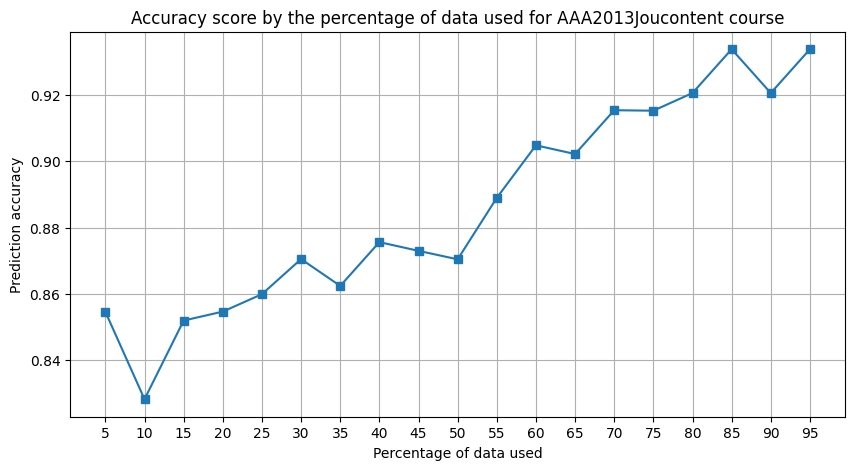

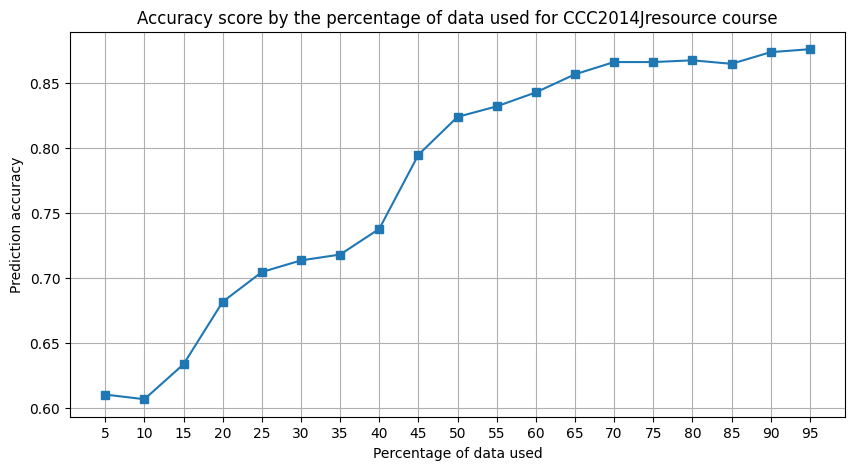

In [ ]:
for scores, name in [(a_scores, "AAA2013Joucontent"), (c_scores, "CCC2014Jresource")]:
    scores.plot(
        title=f"Accuracy score by the percentage of data used for {name} course",
        xlabel="Percentage of data used",
        ylabel="Prediction accuracy",
        xticks=range(5, 100, 5),
        figsize=(10, 5),
        grid=True,
        marker="s",
    )
    plt.show()

## Iteration-2 (TSF all days, all activity types)

In [79]:
click_stream1 = (
    # 1. Extract the number of clicks by students on the three types of material.
    vle.drop(["code_module", "code_presentation", "week_from", "week_to"], axis=1)
    .merge(student_vle, on="id_site")
    # 2. Sum the number of clicks each student makes on each type of material by day.
    .groupby(
        ["code_module", "code_presentation", "id_student", "date"]
    )
    .agg({"sum_click": "sum"})
    # 3. Align each student’s total clicks on each type of material by days.
    .pivot_table(
        values="sum_click",
        index=["code_module", "code_presentation", "id_student"],
        columns="date",
        fill_value=0.0,
    )
    # 4. Add the dropout label, withdrawn as `1`, otherwise as `0`.
    .join(
        student_info.filter(
            ["code_module", "code_presentation", "id_student", "final_result"]
        )
        .assign(final_result=lambda df: (df.final_result == "Withdrawn").astype(int))
        .set_index(["code_module", "code_presentation", "id_student"])
    )
)
display(click_stream1)

-25  -24  -23  -22  -21  -20  -19  \
code_module code_presentation id_student                                      
AAA         2013J             11391         0    0    0    0    0    0    0   
                              28400         0    0    0    0    0    0    0   
                              30268         0    0    0    0    0    0    0   
                              31604         0    0    0    0    0    0    0   
                              32885         0    0    0    0    0    0    0   
...                                       ...  ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0    0    0    0    0   
                              2645731       0    0    0    0    0    0    0   
                              2648187       0    0    0    0    0    0    0   
                              2679821       0    0    0    0    0    0    0   
                              2684003       0    0    0    0    0    0    0   

                                          -18  -17  -16  ...  261  262  263  \
code_module code_presentation id_student                 ...                  
AAA         2013J             11391         0    0    0  ...    0    0    0   
                              28400         0    0    0  ...    0    0    0   
                              30268         0    0    0  ...    0    0    0   
                              31604         0    0    0  ...    1    0    0   
                              32885         0    0    0  ...    0    0    0   
...                                       ...  ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0  ...    0    0    0   
                              2645731       0    0    0  ...    0    0    0   
                              2648187       0    0    0  ...    0    0    0   
                              2679821       0    0    0  ...    0    0    0   
                              2684003       0    0    0  ...    0    0    0   

                                          264  265  266  267  268  269  \
code_module code_presentation id_student                                 
AAA         2013J             11391         0    0    0    0    0    0   
                              28400         0    0    0    0    0    0   
                              30268         0    0    0    0    0    0   
                              31604         1    0    0    0    0    0   
                              32885         0    0    0    0    0    0   
...                                       ...  ...  ...  ...  ...  ...   
GGG         2014J             2640965       0    0    0    0    0    0   
                              2645731       0    0    0    0    0    0   
                              2648187       0    0    0    0    0    0   
                              2679821       0    0    0    0    0    0   
                              2684003       0    0    0    0    0    0   

                                          final_result  
code_module code_presentation id_student                
AAA         2013J             11391                  0  
                              28400                  0  
                              30268                  1  
                              31604                  0  
                              32885                  0  
...                                                ...  
GGG         2014J             2640965                0  
                              2645731                0  
                              2648187                0  
                              2679821                1  
                              2684003                0  

[29228 rows x 296 columns]

In [82]:
# Dropout prediction by course

def get_scores_by_activity_type() -> Iterator[list[float]]:
    """Computes prediction scores for each course."""
    scoring = {'accuracy' : make_scorer(accuracy_score),
              'precision' : make_scorer(precision_score),
              'recall' : make_scorer(recall_score),
              'f1_score' : make_scorer(f1_score),
               'roc_auc' : 'roc_auc'}


    for levels, course_df in click_stream1.groupby(
        level=["code_module", "code_presentation"]
    ):
        # print(f"level: {levels}, course_df shape: {course_df.shape}")
        estimator = TimeSeriesForest(n_estimators=500)
        X = course_df.drop(columns="final_result").values
        y = course_df["final_result"].values

        cv_results = model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)

        mean_accuracy = np.mean(cv_results["test_accuracy"])
        mean_precision = np.mean(cv_results["test_precision"])
        mean_recall = np.mean(cv_results["test_recall"])
        mean_f1_score = np.mean(cv_results["test_f1_score"])
        mean_roc_auc = np.mean(cv_results["test_roc_auc"])

        # yield cv_results
        yield list(levels) + [mean_accuracy] + [mean_precision] + [mean_recall] + [mean_f1_score] + [mean_roc_auc] + [course_df.shape[0]]


results = pd.DataFrame(
    list(get_scores_by_activity_type()),
    columns=["code_module", "code_presentation", "mean_accuracy",
             "mean_precision", "mean_recall", "mean_f1_score", "mean_roc_auc", "Student_Count"],
)
results
# a = list(get_scores_by_activity_type())
# a

,code_module,code_presentation,mean_accuracy,mean_precision,mean_recall,mean_f1_score,mean_roc_auc,Student_Count
0,AAA,2013J,0.928571,0.795853,0.725529,0.746614,0.960264,378
1,AAA,2014J,0.896334,0.697174,0.689655,0.681818,0.952364,357
2,BBB,2013B,0.817834,0.566615,0.540625,0.553103,0.884121,1537
3,BBB,2013J,0.860428,0.607640,0.567485,0.585153,0.914806,1870
4,BBB,2014B,0.846986,0.521010,0.441748,0.475859,0.891209,1294
5,BBB,2014J,0.861535,0.658331,0.704842,0.680263,0.929828,1921
6,CCC,2014B,0.832840,0.760710,0.843210,0.798634,0.911152,1681
7,CCC,2014J,0.906603,0.837880,0.941573,0.886545,0.957737,2302
8,DDD,2013B,0.794069,0.637692,0.700191,0.666515,0.872293,1214
9,DDD,2013J,0.829186,0.672027,0.834216,0.743484,0.898522,1768


In [84]:
results.to_excel("result.xlsx")

### Early preds - cdMd, cdPre

In [93]:
def get_early_scores_by_cdMod_cdPre() -> Iterator[list[float]]:
    """Computes early prediction scores for each course."""
    scoring = {'accuracy' : make_scorer(accuracy_score),
              'precision' : make_scorer(precision_score),
              'recall' : make_scorer(recall_score),
              'f1_score' : make_scorer(f1_score),
               'roc_auc' : 'roc_auc'}


    for levels, course_df in click_stream1.groupby(
        level=["code_module", "code_presentation"]
    ):
        # print(f"level: {levels}, course_df shape: {course_df.shape}")

        y = course_df["final_result"].values
        for i in range(5, 100, 5):
          estimator = TimeSeriesForest(n_estimators=500)
          # X = course_df.drop(columns="final_result").values
          limit = round((course_df.columns.shape[0] - 1) * i / 100)
          X = course_df.loc[:, course_df.columns[:limit]].values

          # mean_score = np.mean(
          #     model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)
          # )
          cv_results = model_selection.cross_validate(estimator, X, y, cv=2, scoring=scoring, n_jobs=-1)

          mean_accuracy = np.mean(cv_results["test_accuracy"])
          mean_precision = np.mean(cv_results["test_precision"])
          mean_recall = np.mean(cv_results["test_recall"])
          mean_f1_score = np.mean(cv_results["test_f1_score"])
          mean_roc_auc = np.mean(cv_results["test_roc_auc"])

          # yield cv_results
          yield list(levels) + [i] + [mean_accuracy] + [mean_precision] + [mean_recall] + [mean_f1_score] + [mean_roc_auc] + [course_df.shape[0]]


results1 = pd.DataFrame(
    list(get_early_scores_by_cdMod_cdPre()),
    columns=["code_module", "code_presentation", "Percent_data", "mean_accuracy",
             "mean_precision", "mean_recall", "mean_f1_score", "mean_roc_auc", "Student_Count"],
)
results1

,code_module,code_presentation,Percent_data,mean_accuracy,mean_precision,mean_recall,mean_f1_score,mean_roc_auc,Student_Count
0,AAA,2013J,5,0.854497,0.000000,0.000000,0.000000,0.500000,378
1,AAA,2013J,10,0.841270,0.125000,0.037037,0.057143,0.439277,378
2,AAA,2013J,15,0.851852,0.500000,0.017857,0.034483,0.487044,378
3,AAA,2013J,20,0.854497,0.714286,0.073413,0.122718,0.561777,378
4,AAA,2013J,25,0.865079,0.750000,0.108466,0.189516,0.658865,378
...,...,...,...,...,...,...,...,...,...
413,GGG,2014J,75,0.869628,0.568270,0.515032,0.514660,0.906576,698
414,GGG,2014J,80,0.872493,0.587762,0.536540,0.532593,0.921126,698
415,GGG,2014J,85,0.873926,0.584058,0.558279,0.548094,0.922430,698
416,GGG,2014J,90,0.883954,0.627232,0.558279,0.567568,0.928330,698


In [95]:
results1.to_excel('result.xlsx')

In [ ]:
click_stream1.groupby(["code_module", "code_presentation"]).size().sum()


29228

## Iteration-3 ()

In [ ]:
student_info.shape, student_assessment.shape, assessments.shape

((32593, 12), (173912, 5), (206, 6))

In [ ]:
student_assessment[student_assessment['id_student'] == 11391]

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
501,1753,11391,53,0,85.0
842,1754,11391,115,0,80.0
1032,1755,11391,164,0,85.0
1457,1756,11391,212,0,82.0


In [ ]:
student_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [ ]:
student_assessment[student_assessment['score'].isna()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [ ]:
assessments[(assessments['code_module']=='AAA') & (assessments['code_presentation']=='2013J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


In [ ]:
assessments['assessment_type'].value_counts()

assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64

In [ ]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [ ]:
assessments[assessments['date'].isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [ ]:
aassessmentsCombinedDf = student_assessment.merge(assessments, on=['id_assessment'])
aassessmentsCombinedDf

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [ ]:
aassessmentsCombinedDf.isna().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                 173
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
dtype: int64

In [ ]:
aassessmentsCombinedDf[aassessmentsCombinedDf['score'].isna()].assessment_type.value_counts()

assessment_type
TMA    173
Name: count, dtype: int64

In [ ]:
df = aassessmentsCombinedDf[aassessmentsCombinedDf['id_student'] == 11391].copy()
df

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
501,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0
842,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0
1032,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0
1457,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0


In [ ]:
df['weighted_score'] = df['score'] * df['weight'] / 100
df['sum_weighted_score'] = df.groupby(["code_module","code_presentation","id_student"])['weighted_score'].transform('sum')
df['sum_weight'] = df.groupby(["code_module","code_presentation","id_student"])['weight'].transform('sum')
df

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,weighted_score,sum_weighted_score,sum_weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8,82.4,100.0
501,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,17.0,82.4,100.0
842,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,16.0,82.4,100.0
1032,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,17.0,82.4,100.0
1457,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,24.6,82.4,100.0


In [ ]:
df = df.groupby(['code_module','code_presentation','id_student'], as_index=False).last()
df['final_weighted_score'] = df['sum_weighted_score'] / df['sum_weight']
df

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,weighted_score,sum_weighted_score,sum_weight,final_weighted_score
0,AAA,2013J,11391,1756,212,0,82.0,TMA,215.0,30.0,24.6,82.4,100.0,0.824


In [ ]:
student_vle.shape, vle.shape

((10655280, 6), (6364, 6))

In [ ]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [ ]:
vleCombinedDf = student_vle.merge(vle, on=['code_module','code_presentation', 'id_site']).drop(['week_from', 'week_to'], axis=1)
vleCombinedDf

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng
...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent
10655276,GGG,2014J,499187,896969,228,8,oucontent
10655277,GGG,2014J,629258,896969,228,23,oucontent
10655278,GGG,2014J,534672,896969,228,1,oucontent


In [ ]:
vleCombinedDf.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
activity_type        0
dtype: int64

In [ ]:
vleCombinedDf[vleCombinedDf['id_student']==28400].shape

(430, 7)

In [ ]:
vleCombinedDf['avgClicksPerDay'] = (vleCombinedDf.groupby(['code_module','code_presentation','id_student'])['sum_click']
                                    .transform('mean'))
vleCombinedDf

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,avgClicksPerDay
0,AAA,2013J,28400,546652,-10,4,forumng,3.337209
1,AAA,2013J,28400,546652,-10,1,forumng,3.337209
2,AAA,2013J,28400,546652,-10,1,forumng,3.337209
3,AAA,2013J,28400,546652,-10,8,forumng,3.337209
4,AAA,2013J,30268,546652,-10,3,forumng,3.697368
...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent,2.758242
10655276,GGG,2014J,499187,896969,228,8,oucontent,3.306667
10655277,GGG,2014J,629258,896969,228,23,oucontent,4.511278
10655278,GGG,2014J,534672,896969,228,1,oucontent,2.928571


In [88]:
# vleCombinedDf['ranked'] = (vleCombinedDf.groupby(['code_module','code_presentation','id_student'])['date']
#                            .rank(ascending=True))
# vleCombinedDf

In [ ]:
(vleCombinedDf.groupby(['code_module','code_presentation','id_student'], as_index=False).first())

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,avgClicksPerDay,ranked
0,AAA,2013J,11391,546652,-5,1,forumng,4.765306,6.0
1,AAA,2013J,28400,546652,-10,4,forumng,3.337209,7.5
2,AAA,2013J,30268,546652,-10,3,forumng,3.697368,2.5
3,AAA,2013J,31604,546652,-9,2,forumng,3.254902,17.0
4,AAA,2013J,32885,546652,-10,1,forumng,2.937500,9.5
...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,897076,17,1,resource,2.157895,11.0
29224,GGG,2014J,2645731,897050,110,1,resource,3.767932,56.0
29225,GGG,2014J,2648187,897076,-10,2,resource,2.888889,4.0
29226,GGG,2014J,2679821,897050,-14,1,resource,4.508197,4.5


In [ ]:
print(f"Sudents having no join with vle data: {32593-29228}")

Sudents having no join with vle data: 3365


In [19]:
np.arange(0,50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])